In [1]:
from datetime import datetime
import pytz

def datetimeStringToUnix(datetime_str):

    # Define the concatenated string datetime and the timezone
    # datetime_str = '20230102 10:00:00 Japan'

    # Parse the string datetime into a datetime object
    date = datetime.strptime(datetime_str[:17], '%Y%m%d %H:%M:%S')

    # Get the timezone from the string and create a timezone object
    timezone_str = datetime_str[18:]
    timezone = pytz.timezone(timezone_str)

    # Adjust the datetime object for the given timezone
    date_timezone = timezone.localize(date)
    unix_timestamp = int(date_timezone.timestamp())

    #print(unix_timestamp)
    return unix_timestamp

In [2]:
import h5py

with h5py.File('/Users/kmangutov/dev/steel3/data_hdf5/202306_CME_ES_FUT_USD.h5', 'r') as f:
    ohlc_dataset = f['bars']
    first_row = ohlc_dataset[0]
    print(first_row)


(1664890200, 3801., 3801., 3801., 3801., 0, 0, 3801.)


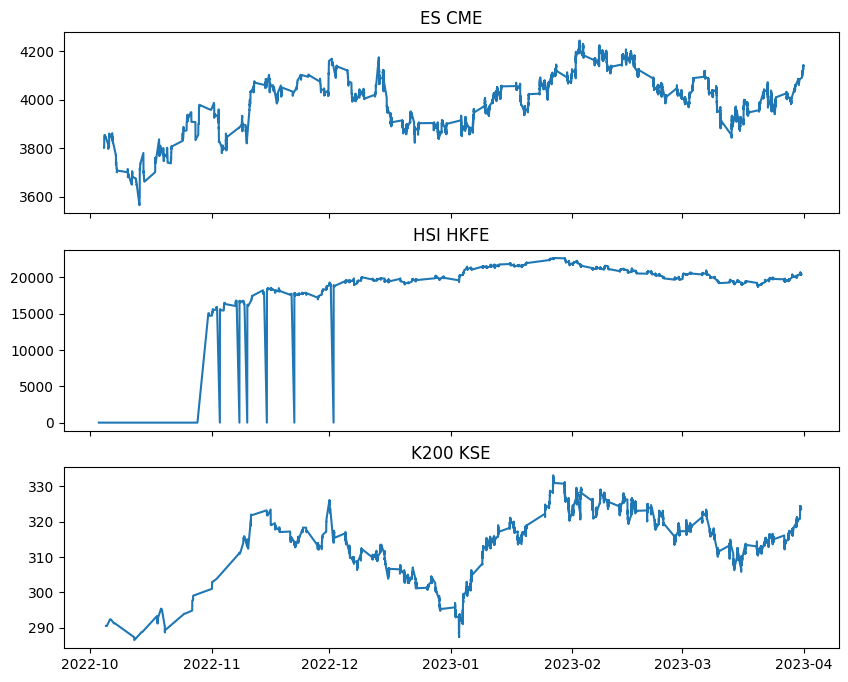

In [3]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths and corresponding symbol and exchange values
file_paths = [
    '/Users/kmangutov/dev/steel3/data_hdf5/202306_CME_ES_FUT_USD.h5',
    '/Users/kmangutov/dev/steel3/data_hdf5/202306_HKFE_HSI_FUT_HKD.h5',
    '/Users/kmangutov/dev/steel3/data_hdf5/202306_KSE_K200_FUT_KRW.h5'
]
symbols = ['ES', 'HSI', 'K200']
exchanges = ['CME', 'HKFE', 'KSE']

# Load the data from each file into a list of dataframes
dfs = []
for path in file_paths:
    with h5py.File(path, 'r') as f:
        data = f['bars'][()]
        df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'barCount', 'wap'])
        dfs.append(df)

# Add columns for symbol and exchange
for i, df in enumerate(dfs):
    df['symbol'] = symbols[i]
    df['exchange'] = exchanges[i]

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

# Convert the timestamp column to datetime and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)

# Plot the wap with a shared x axis
fig, axs = plt.subplots(nrows=len(symbols), sharex=True, sharey=False, figsize=(10, 8))
for i, sym in enumerate(symbols):
    axs[i].plot(df.loc[df['symbol'] == sym]['wap'])
    axs[i].set_title(f'{sym} {exchanges[i]}')
plt.show()